# 8. 供給設備の技術上の基準

<input type="date" name="created_date" value="2020-07-30">

<annotation msg="This version of notebook is now released as <img src='https://img.icons8.com/ios/50/000000/alpha.png'" />

# プログラミング演習

## Install dependency

In [1]:
!pip install moviepy opencv-python

     |████████████████████████████████| 388 kB 358 kB/s eta 0:00:01
     |████████████████████████████████| 22.5 MB 3.7 MB/s eta 0:00:01
  Created wheel for moviepy: filename=moviepy-1.0.3-py3-none-any.whl size=110727 sha256=c4a5a3a72c03d1de40a51c5854c9f99aff296bc24bb839e5f7820ab214f1c5ea
  Stored in directory: /Users/yoshinobuhiroaki/Library/Caches/pip/wheels/56/dc/2b/9cd600d483c04af3353d66623056fc03faed76b7518faae4df
  Created wheel for proglog: filename=proglog-0.1.9-py3-none-any.whl size=6146 sha256=c2060eb6e9e7ed36bd8fb356a050adf68f2529c913e290ddb7262b597fbd9338
  Stored in directory: /Users/yoshinobuhiroaki/Library/Caches/pip/wheels/12/36/1f/dc61e6ac10781d63cf6fa045eb09fa613a667384e12cb6e6e0
Successfully built moviepy proglog


## Load video and down-sampling

In [ ]:
!wget https://github.com/yoshinobu-sekiyu/Modernize/blob/master/第二種販売主任者/colab.google.com/Gas-leak-detection.mov

### Using moviepy

In [2]:
from moviepy.editor import *

# Load video
video = VideoFileClip("Gas-leak-detection.mov")
# Checking frame size
video.duration

20.8

In [3]:
# Load video file and select the subclip 00:00:10 - 00:00:12
clip = video.subclip(10,12)
clip

### Using opencv

In [1]:
import cv2
cap = cv2.VideoCapture('Gas-leak-detection.mov')
print(cap.get(cv2.CAP_PROP_FRAME_COUNT) / cap.get(cv2.CAP_PROP_FPS))

20.801666666666666


In [20]:
cap.set(cv2.CAP_PROP_POS_FRAMES, 10)
print(cap.get(cv2.CAP_PROP_POS_FRAMES))

10.0


## Extracting frames

### Using moviepy

In [9]:
import os
import numpy as np

def extract_frames_moviepy(movie, times, imgdir):
    global clip
    try:
        clip = clip
    except:
        clip = VideoFileClip(movie)
    for t in times:
        imgpath = os.path.join(imgdir, '{}.png'.format(t))
        clip.save_frame(imgpath, t)

imgdir = 'frames'
times = np.linspace(0, video.duration, num=20)

extract_frames(clip, times, imgdir)

In [8]:
!cd frames && ls

0.1.png   0.63.png  0.947.png 1.2.png   1.7.png


### Using opencv

In [4]:
from PIL import Image

def extract_frames_opencv(start, save_path):
    global cap
    
    cap.set(cv2.CAP_PROP_POS_FRAMES, start)
    imgs = []
    
    # Getting 5o frames from the start point.
    count = 0
    while count < 50:
        ret, frame = cap.read()
        imgs.append(frame)
        count += 1
    
    stack = []
    for img in imgs:
        stack.append(Image.fromarray(img))
    stack[0].save(save_path, compression="tiff_deflate", save_all=True, append_images=stack[1:])
    
extract_frames_opencv(20, "frames/stack.tiff")
    

## Reading frames, as usual

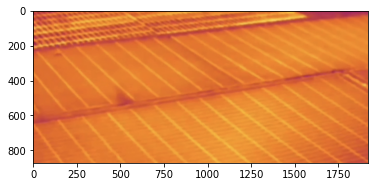

In [5]:
import matplotlib.pyplot as plt
from skimage.io import imread

img = imread("frames/0.1.png")
plt.imshow(img)
plt.show()

## Time-series vizualization

### Using moviepy

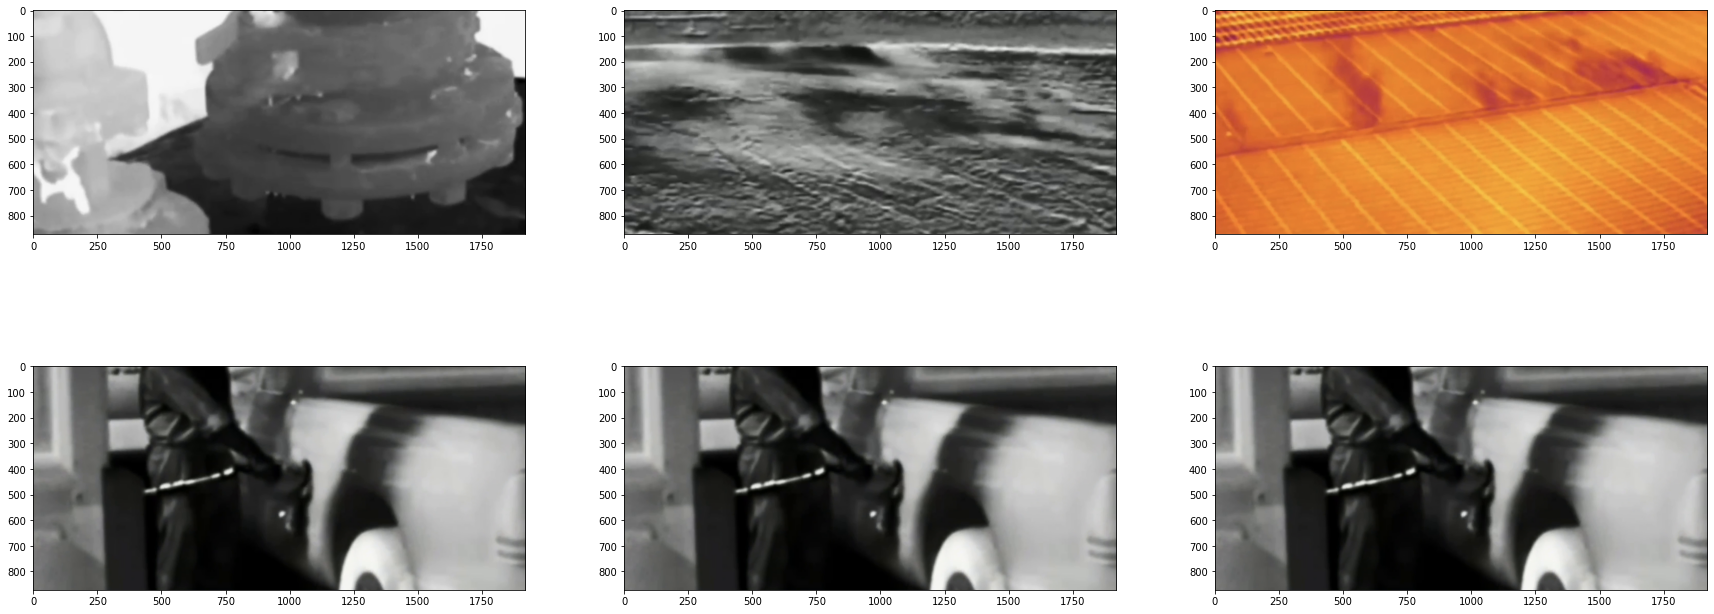

In [12]:
# Vizualizing multiple frames at once.
from pathlib import Path

p = Path("frames")

paths = list(p.glob("**/*.png"))

fig=plt.figure(figsize=(30, 12))
columns = 3
rows = 2
for i in range(1, columns*rows +1):
    img = imread(paths[i])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

### Using opencv

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

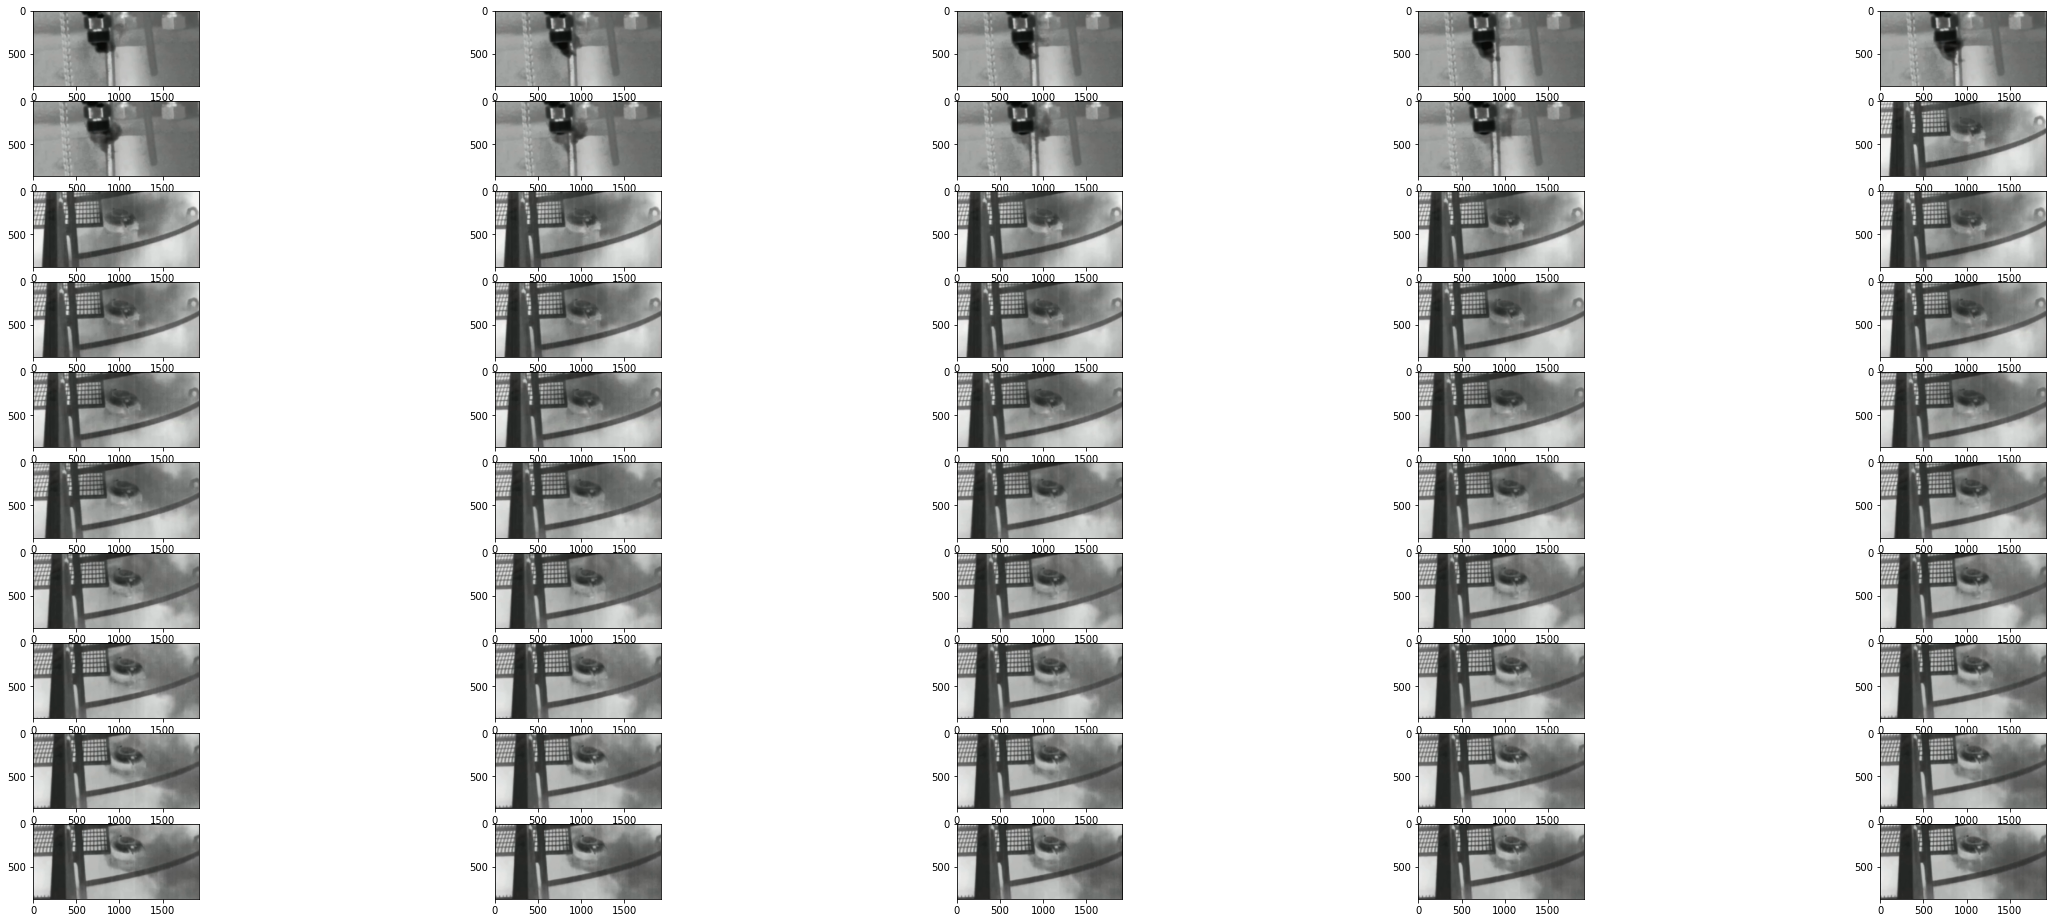

In [6]:
try:
    img = imread("frames/stack.tiff")
except:
    from skimage.io import imread
    img = imread("frames/stack.tiff")

framenum = 0
rows = int(img.shape[0]/5) + 1
columns = 5

fig=plt.figure(figsize=(40, 18))
while framenum < img.shape[0]:
    fram = img[framenum, :, :, :]
    fig.add_subplot(rows, columns, framenum+1)
    plt.imshow(fram)
    framenum += 1
plt.show()

# Copyrights

All rights reserved for 吉延石油株式会社 and the publishers of scraped resources.

Special thanks to the publishers of [this video clip](https://youtu.be/vcOpAdS2cjo).

参考:

* https://stackoverrun.com/ja/q/11865382
    
* https://youtu.be/vcOpAdS2cjo
    
* https://www.flir.jp/discover/instruments/gas-detection/the-science-behind-optical-gas-imaging/

* https://zulko.github.io/moviepy/getting_started/quick_presentation.html

* https://note.nkmk.me/python-opencv-videocapture-file-camera/

* https://qiita.com/machisuke/items/0ca8a09d79bd5eba3cf3